# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 14: Partial and Part Correlation. Multiple Linear Regression. One-Hot Encoding.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## 1. Partial and Part Correlation

### Partial Correlation

Partial correlation is a statistical technique used to measure the association between two variables, while controlling for the effect of one or more other variables. In other words, it is a way to determine the relationship between two variables while accounting for the influence of other variables that may also affect the relationship.

To understand partial correlation, consider a simple example of three variables: $A$, $B$, and $C$. The correlation between $A$ and $B$ measures the strength of the relationship between $A$ and $B$, while ignoring the effect of $C$. However, if $C$ is also related to both $A$ and $B$, then the observed correlation between $A$ and $B$ may be influenced by the presence of $C$. In such cases, partial correlation can be used to measure the relationship between $A$ and $B$ while controlling for the effect of $C$.

Partial correlation is typically expressed as a correlation coefficient, just like the simple correlation between two variables. However, the partial correlation coefficient measures the relationship between two variables while controlling for the effect of one or more other variables. The partial correlation coefficient between variables $A$ and $B$, controlling for the effect of variable $C$, is denoted as $r_{AB.C}$.

The formula for partial correlation coefficient $r_{AB.C}$ can be derived from the formula for the simple correlation coefficient $r_{AB}$, as follows:

$$r_{AB.C} = \frac{r_{AB} - r_{AC} * r_{BC}}{\sqrt{(1 - r_{AC}^2) * (1 - r_{BC}^2)}}$$

where $r_{AB}$ is the simple correlation coefficient between $A$ and $B$, $r_{AC}$ is the correlation coefficient between $A$ and $C$, and $r_{BC}$ is the correlation coefficient between $B$ and $C$.

The partial correlation coefficient can be interpreted as the correlation between $A$ and $B$, after controlling for the effect of variable $C$. It represents the degree to which the relationship between $A$ and $B$ is independent of the influence of variable $C$.

Partial correlation can be used in a variety of applications, such as in regression analysis to identify the independent effect of each variable on the dependent variable, or in network analysis to identify the direct connections between variables in a network while controlling for indirect effects.

However, what did we say about **formulas** in this course?

In [48]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - science
import numpy as np
import scipy as sp

# - data
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

We will now produce three variables, $A$, $B$, and $C$, using normally distributed random numbers for $A$ and then producing $B, C$ so to be correlated with $A$ up to a degree:

In [49]:
# - generate A as 
A = sp.stats.norm.rvs(loc=15, scale = 10, size = 1000)
# - B is a noisy linear transformation of A:
error_B = sp.stats.norm.rvs(loc=0, scale = 7, size = 1000)
intercept_B = 7.5
slope_B = .78
B = intercept_B + slope_B*A + error_B
# - A is also a a noisy linear transformation of A:
error_C = sp.stats.norm.rvs(loc=0, scale = 9.5, size = 1000)
intercept_C = 4.5
slope_C = 1.51
C = intercept_C + slope_C*A + error_C
# - correlations
ABC = pd.DataFrame({'A':A, 'B':B, 'C':C})
ABC.corr()

,A,B,C
A,1.000000,0.768376,0.855462
B,0.768376,1.000000,0.664099
C,0.855462,0.664099,1.000000


Now, we need two simple linear regression models:
- C predicts A, and 
- C predicts B. 

In [50]:
formula = 'A ~ C'
lm_CA = smf.ols(formula=formula, data=ABC).fit()
res_A = lm_CA.resid
formula = 'B ~ C'
lm_CB = smf.ols(formula=formula, data=ABC).fit()
res_B = lm_CB.resid

Now we have the residual from the $A~C$ regression in `lm_CA` and from the $B~C$ regression in `lm_CB`.
The correlation between what is left of $A, B$ - **their residualds** - following their regression with $C$ as a predictor **is the partial correlation** $r_{AB.C}$:

In [51]:
sp.stats.pearsonr(res_A, res_B)

PearsonRResult(statistic=0.517239274718166, pvalue=1.6428999761348632e-69)

Let's check by writing out our own function for partial correlation from the formula provided above!

In [52]:
def partial_correlation(data):
    r_ab = sp.stats.pearsonr(data['A'], data['B'])[0]
    r_ac = sp.stats.pearsonr(data['A'], data['C'])[0]
    r_bc = sp.stats.pearsonr(data['B'], data['C'])[0]
    par_coef = r_ab - r_ac*r_bc
    par_coef = par_coef/np.sqrt((1-r_ac**2)*(1-r_bc**2))
    return par_coef
partial_correlation(ABC)

0.5172392747181672

### Part (or semi-partial) correlation

In some cases, it may also be useful to measure the association between two variables **while controlling for the effect of only one other variable**. This is known as the **semi-partial correlation**, also called **part correlation**.

The semi-partial correlation measures the correlation between two variables, with the influence of one other variable removed. Specifically, it measures the unique variance of one variable that is not explained by the other variable, after controlling for the shared variance with the third variable.

The semi-partial correlation coefficient $r_{A.BC}$ represents the correlation between variables $A$ and $B$ after controlling for the effect of variable $C$ on $A$. It is the amount of variance in variable $A$ that is not shared with variable $C$, but is uniquely associated with variable $B$. The semi-partial correlation is often used in regression analysis to identify the independent effect of each predictor on the dependent variable.

To understand what part correlation between $A$ and $B$ is while controlling for the effect of $C$ on $A$:

- perform a simple linear regression where $C$ predicts $A$,
- and then find the correlation between $B$ and the **residuals** of $A$ following its regression with $C$:

In [53]:
formula = 'A ~ C'
lm_CA = smf.ols(formula=formula, data=ABC).fit()
res_A = lm_CA.resid
sp.stats.pearsonr(B, res_A)

PearsonRResult(statistic=0.38671101486785975, pvalue=5.109254969396452e-37)

So, part correlation $r_{A.BC}$ is the correlation between $B$ and what is left of $A$ following its regression with $C$. The residuals from the $C~A$ regression are what $C$ cannot explain in $A$, and that is why we say that $r_{A.BC}$ represents the correlation between $B$ and $A$ following the removal of the effect of $C$ on $A$.

## 2. Multiple Linear Regression

Multiple linear regression is a statistical model that seeks to describe the relationship between two or more continuous variables. The model assumes that there is a linear relationship between the dependent variable and one or more independent variables, and seeks to estimate the coefficients of this relationship.

The model is called "multiple" linear regression because it involves more than one independent variable. In contrast to simple linear regression, which involves only one independent variable, multiple linear regression allows us to analyze the effects of several variables on the dependent variable simultaneously.

The `Fish.csv` data set, again:

In [54]:
# - loading the dataset
# - Kaggle: https://www.kaggle.com/datasets/aungpyaeap/fish-market
# - place it in your _data/ directory
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [55]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Target: predict weight from all continuous predictors

In [56]:
model_frame = fish_data.drop(columns='Species')
model_frame

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [57]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

The formula for the Multiple Linear Regression Model has the form

$$y = \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \beta_0 + \varepsilon,$$

where 

- $y$ - the true value of target variable
- $x_1, x_2, \ldots, x_k$ - the predictors' values
- $\beta_1, \beta_2, \ldots, \beta_k$ - model's parameters for the predictors
- $\beta_0$ - the intercept of the model
- $\varepsilon$ - the residual

To predict a value $\hat{y}$ of the target variable via Multiple Linear Regression, we use

$$\hat{y} = \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \beta_0.$$

In [58]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Length1 + Length2 + Length3 + Height + Width'

In [59]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.95e-70
Time:                        18:45:36   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# - model's parameters
linear_model.params

Intercept   -499.586955
Length1       62.355214
Length2       -6.526752
Length3      -29.026219
Height        28.297351
Width         22.473307
dtype: float64

In [61]:
# - predicting the values using linear model's formula and parameters
model_frame['Predicted Weight'] = linear_model.predict()

In [62]:
# - calculating the residuals - the difference between the true and predicted values
model_frame['Residuals'] = linear_model.resid

In [63]:
model_frame

,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight,Residuals
0,242.0,23.2,25.4,30.0,11.5200,4.0200,326.816128,-84.816128
1,290.0,24.0,26.3,31.2,12.4800,4.3056,369.578593,-79.578593
2,340.0,23.9,26.5,31.1,12.3778,4.6961,370.824180,-30.824180
3,363.0,26.3,29.0,33.5,12.7300,4.4555,439.056139,-76.056139
4,430.0,26.5,29.0,34.0,12.4440,5.1340,444.169168,-14.169168
...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,-160.608116,172.808116
155,13.4,11.7,12.4,13.5,2.4300,1.2690,-145.535439,158.935439
156,12.2,12.1,13.0,13.8,2.2770,1.2558,-137.843413,150.043413
157,19.7,13.2,14.3,15.2,2.8728,2.0672,-83.279758,102.979758


In [64]:
# - some statistics on the residuals
model_frame['Residuals'].describe()

count    1.590000e+02
mean     1.315621e-12
std      1.212449e+02
min     -2.436873e+02
25%     -6.509770e+01
50%     -2.552057e+01
75%      5.798004e+01
max      4.472475e+02
Name: Residuals, dtype: float64

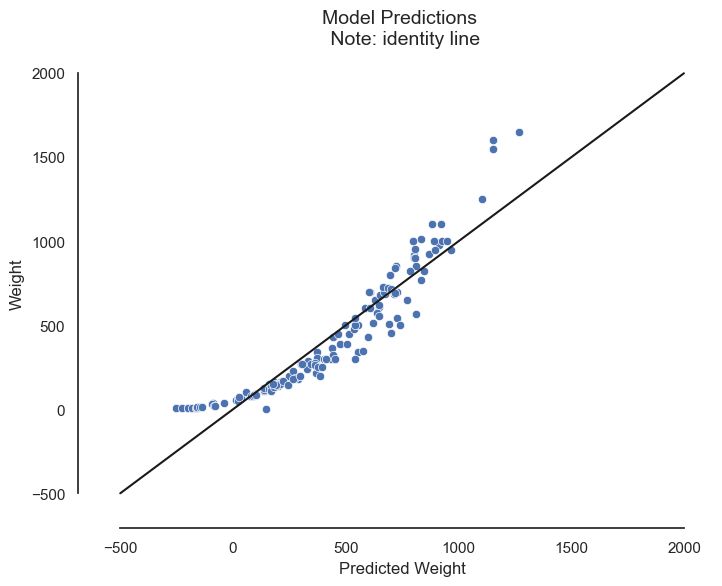

In [65]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-500, 2000), y=np.arange(-500, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

In [66]:
# - Pearson's correlation (R-value) coefficient and R^2
print(f"Pearson's correlation (R-value): {round(np.sqrt(linear_model.rsquared), 4)}")
print(f"Coefficient of determination (R^2): {round(linear_model.rsquared, 4)}")

Pearson's correlation (R-value): 0.9409
Coefficient of determination (R^2): 0.8853


In [67]:
# - p-values of the model's parameters
print(f"p-values: \n{linear_model.pvalues}")

p-values: 
Intercept    8.441362e-37
Length1      1.230186e-01
Length2      8.760053e-01
Length3      9.643079e-02
Height       1.458477e-03
Width        2.716892e-01
dtype: float64


In [68]:
# R^2 upacked - calculating R^2 using the corresponding formulas
total_sse = np.sum((model_frame['Weight'] - model_frame['Weight'].mean())**2)
model_sse = np.sum((model_frame['Predicted Weight'] - model_frame['Weight'].mean())**2)
residual_sse = np.sum(model_frame['Residuals']**2)

print(np.isclose(total_sse, model_sse + residual_sse))

True


In [69]:
# - yet another way to calculate R^2
model_sse/total_sse

0.885286704654616

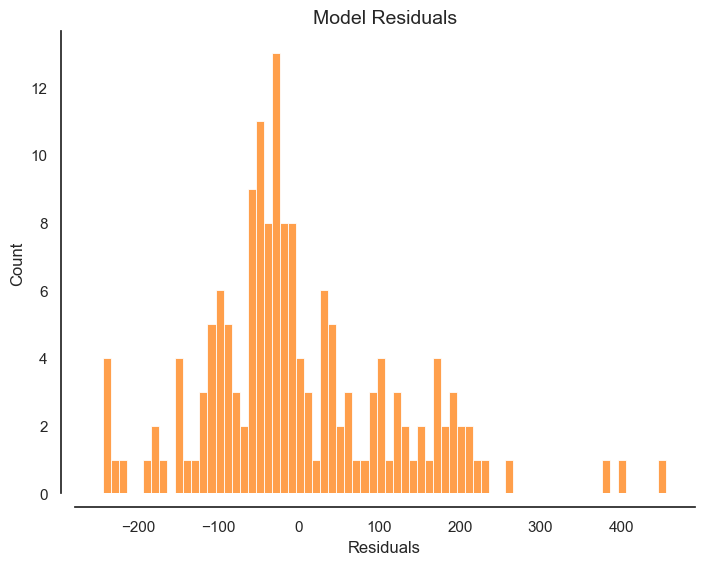

In [70]:
# - plotting the distribution of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(data=model_frame, x='Residuals', binwidth=10, color='tab:orange')
sns.despine(offset=10, trim=False)
plt.title('Model Residuals', fontsize=14);

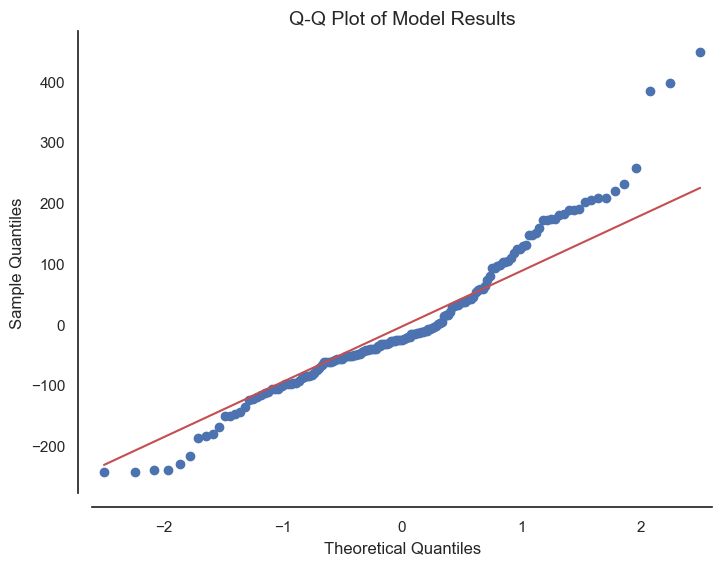

In [71]:
# - plotting the qqplot
sm.qqplot(model_frame['Residuals'].values, line='q')
sns.despine(offset=10)
plt.title('Q-Q Plot of Model Results', fontsize=14);

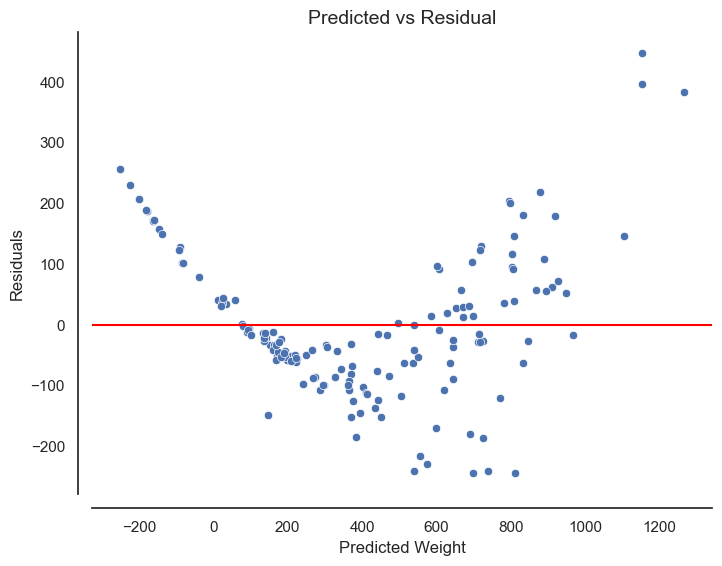

In [72]:
### --- Heteroskedacity

# - plotting the predicted values vs the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Residuals')
sns.despine(offset=10)
plt.axhline(y=0, color='red')
plt.title('Predicted vs Residual', fontsize=14);

In [73]:
# - identifying the influental cases
model_inf = linear_model.get_influence()
inf_frame = model_inf.summary_frame()
inf_frame

,dfb_Intercept,dfb_Length1,dfb_Length2,dfb_Length3,dfb_Height,dfb_Width,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.014971,0.013313,0.015105,-0.061481,0.024483,-0.007549,0.002071,-0.697129,0.024926,-0.111461,-0.695954,-0.111273
1,-0.007100,0.011868,0.016926,-0.062002,0.023480,-0.012842,0.002076,-0.655179,0.028193,-0.111593,-0.653952,-0.111384
2,0.004293,0.029358,-0.014546,-0.026450,0.021258,-0.015360,0.000425,-0.255032,0.037721,-0.050493,-0.254251,-0.050339
3,0.002442,0.059705,-0.051392,-0.008673,-0.008840,0.031107,0.001918,-0.626276,0.028497,-0.107261,-0.625028,-0.107048
4,0.003725,0.004675,0.005207,-0.020717,0.016021,-0.014936,0.000106,-0.117607,0.043838,-0.025182,-0.117227,-0.025101
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.230454,0.097695,-0.103952,0.033734,-0.017510,-0.026127,0.011360,1.425865,0.032439,0.261079,1.430736,0.261971
155,0.228208,0.105397,-0.078481,-0.036793,0.057673,-0.093287,0.010625,1.313568,0.035630,0.252487,1.316714,0.253091
156,0.206981,0.028224,0.013098,-0.083006,0.075653,-0.126856,0.009100,1.239244,0.034333,0.233668,1.241434,0.234081
157,0.109987,-0.008234,0.010811,-0.009464,-0.010875,-0.008333,0.002564,0.844768,0.021105,0.124039,0.843973,0.123922


In [74]:
### --- Influence Measures

# - calculating the Cook's distance /Cook and Weisberg (1982)/
# - consider values with Cook's distance greater than 1 to be problematic

w_cookD = np.argwhere(model_inf.cooks_distance[0] > 1)
w_cookD

array([], shape=(0, 1), dtype=int64)

In [75]:
# - Leverage: hat values
# - Average Leverage = (k+1)/n
# - k - num. of predictors
# - n - num. observations
# - Also termed: hat values, range: 0 - 1
# - Various criteria (twice the average leverage, three times the average leverage...)

k = len(predictors)
n = len(model_frame)
w_leverage = np.argwhere(model_inf.hat_matrix_diag > 2*(k+1)/n)
w_leverage

array([[111],
       [113],
       [118],
       [129],
       [130],
       [141],
       [142],
       [143],
       [144]])

In [76]:
### --- The influence plot
inf_plot_frame = pd.DataFrame(columns=['Residuals', 'Leverage', 'Cook Dist.'])

inf_plot_frame['Residuals'] = model_frame['Residuals']
inf_plot_frame['Leverage'] = model_inf.hat_matrix_diag
inf_plot_frame['Cook Dist.'] = model_inf.cooks_distance[0]

inf_plot_frame

,Residuals,Leverage,Cook Dist.
0,-84.816128,0.024926,0.002071
1,-79.578593,0.028193,0.002076
2,-30.824180,0.037721,0.000425
3,-76.056139,0.028497,0.001918
4,-14.169168,0.043838,0.000106
...,...,...,...
154,172.808116,0.032439,0.011360
155,158.935439,0.035630,0.010625
156,150.043413,0.034333,0.009100
157,102.979758,0.021105,0.002564


In regression analysis, the influence plot is a diagnostic tool that helps identify influential observations in the data set. It shows the residuals on the y-axis, leverage on the x-axis, and uses the size of the bubbles to represent Cook's distance, which is a measure of the influence of each observation on the regression coefficients.

Residuals are the differences between the observed values of the dependent variable and the predicted values from the regression model. Leverage refers to the degree to which an observation differs from the others in terms of its values of the independent variables. Cook's distance is a measure of the influence of each observation on the regression coefficients, taking into account both the residual and the leverage.

The influence plot is useful for detecting outliers and influential observations that can have a significant impact on the results of the regression analysis. Outliers are observations that are far from the other observations in terms of their values of the dependent and independent variables. Influential observations are those that have a large impact on the regression coefficients, often because they have a high leverage and/or large residuals.

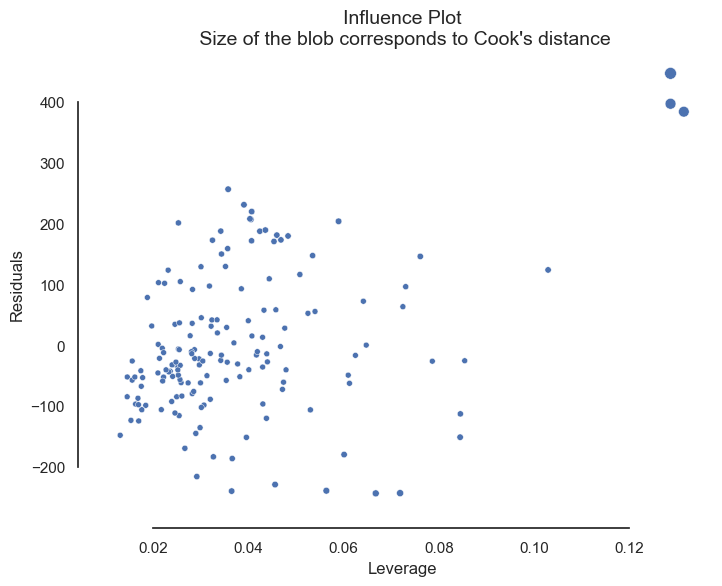

In [77]:
# - plotting the influence plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inf_plot_frame, x='Leverage', y='Residuals', size='Cook Dist.', legend=None)
sns.despine(offset=10, trim=True)
plt.title("Influence Plot\n Size of the blob corresponds to Cook's distance", fontsize=14);

**Multicolinearity** 

Multicollinearity is a problem that can occur in multiple linear regression when there is a high correlation between two or more independent variables. Multicollinearity can cause issues with the estimation of the regression coefficients, as well as with the interpretation of the results.

One of the main problems with multicollinearity is that it can make it difficult to determine the independent effect of each variable on the dependent variable. This is because when two or more independent variables are highly correlated, it can be difficult to determine which variable is responsible for the observed changes in the dependent variable. In other words, the effects of the correlated variables may be confounded or mixed together.

Multicollinearity can also cause issues with the estimation of the regression coefficients. In particular, multicollinearity can cause the estimated coefficients to have large standard errors, which makes them less precise and less reliable. This can also make it difficult to detect the true relationship between the independent variables and the dependent variable, as the estimated coefficients may not accurately reflect the true population values.

In addition to these issues, multicollinearity can also cause problems with the stability of the regression coefficients. This means that small changes in the data can lead to large changes in the estimated coefficients. This can make it difficult to use the regression model for prediction, as small changes in the data can lead to unpredictable changes in the predicted values.

In [78]:
### --- Multicolinearity
model_frame[predictors].corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.867050,0.873547,0.878520,0.792881,1.000000


**Variance Inflation Factor**

The Variance Inflation Factor (VIF) is a measure of the degree of multicollinearity in a multiple linear regression model. Specifically, the VIF measures the extent to which the variance of the estimated regression coefficient of one independent variable is inflated due to the presence of correlation among the independent variables.

The VIF for each independent variable is calculated by regressing that variable on all the other independent variables in the model, and then taking the reciprocal of the R-squared value for that regression. The formula for VIF is:

$$VIF = \frac{1}{(1 - R^2)}$$

where $R^2$ is the coefficient of determination for the regression of the independent variable on all the other independent variables in the model.

The VIF values range from 1 to infinity, with a VIF of 1 indicating no multicollinearity and a VIF of infinity indicating perfect multicollinearity. A commonly used rule of thumb is that a VIF value greater than 5 or 10 indicates significant multicollinearity, although the exact threshold may depend on the specific application.

The VIF can be used to identify which independent variables are contributing most to the multicollinearity in the model. If a variable has a high VIF, it indicates that its regression coefficient is highly sensitive to the presence of multicollinearity and may not be reliable. In such cases, it may be necessary to remove the variable from the model or find a way to reduce the correlation among the independent variables.

In [79]:
### --- Variance Inflation Factors (VIFs)

# - appending the columns of ones to the predictors' data
model_frame_predictors = sm.add_constant(model_frame[predictors])
model_frame_predictors

,const,Length1,Length2,Length3,Height,Width
0,1.0,23.2,25.4,30.0,11.5200,4.0200
1,1.0,24.0,26.3,31.2,12.4800,4.3056
2,1.0,23.9,26.5,31.1,12.3778,4.6961
3,1.0,26.3,29.0,33.5,12.7300,4.4555
4,1.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,1.0,11.5,12.2,13.4,2.0904,1.3936
155,1.0,11.7,12.4,13.5,2.4300,1.2690
156,1.0,12.1,13.0,13.8,2.2770,1.2558
157,1.0,13.2,14.3,15.2,2.8728,2.0672


In [80]:
# - computing VIFs

# - NOTE: 
# The lower bound of VIF is 1; 
# - there is no upper bound;
# - VIF > 2 indicates high variance inflation
vifs = [variance_inflation_factor(model_frame_predictors.values, i) for i in range(1, len(predictors)+1)]
vifs = np.array(vifs).reshape(1, -1)
vifs
pd.DataFrame(vifs, columns=predictors)

,Length1,Length2,Length3,Height,Width
0,1681.496487,2084.257828,422.468251,14.570087,12.275361


The square root of the VIF can be interpreted as the amount by which the standard error of the regression coefficient is increased due to multicollinearity. In other words, if the square root of the VIF for an independent variable is 2, it means that the standard error of the regression coefficient for that variable is twice as large as it would be if there were no multicollinearity. This makes it more difficult to detect a significant relationship between that variable and the dependent variable.

In [81]:
# - square roots of VIFs
pd.DataFrame(np.sqrt(vifs), columns=predictors)

,Length1,Length2,Length3,Height,Width
0,41.006054,45.653673,20.554032,3.817078,3.503621


### Multiple Linear Regression using scikit-learn


In [82]:
# - import scikit-learn
from sklearn.linear_model import LinearRegression

In [83]:
model_frame = fish_data.drop(columns='Species')

In [84]:
### --- Fitting the linear model to the numerical data

# - independent variables
X = model_frame.drop(columns='Weight')

# - the dependent variable
y = model_frame['Weight'].values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [85]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
          22.47330665]]),
 array([-499.58695536]))

In [86]:
# - calculating R^2 
lin_reg.score(X, y)

0.8852867046546207

In [87]:
# - predicting the weight using the model
y_pred = lin_reg.predict(X)
y_pred[:10]

array([[326.81612777],
       [369.57859339],
       [370.82418025],
       [439.05613854],
       [444.16916821],
       [466.12531938],
       [496.15134252],
       [473.62398623],
       [511.95189321],
       [540.44545602]])

## 3. One-Hot (Dummy) Encoding

### Target: predict weight from all the predictors (both categorical and continuous)

In [88]:
model_frame = fish_data.copy()
model_frame

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [89]:
# - number of data entries grouped by species class
model_frame['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [90]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In one hot encoding categorical predictor 'split' into $C$ binary vectors, where $C$ is the number of categories. Each coordinate of this vector becomes a new "dummy" feature, corresponding to one category of a categorical variable. We won't write explicit mathematical formula of the model in this case, as it would require us going into some Linear Algebra and matrix-vector notation. 

In [91]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Species + Length1 + Length2 + Length3 + Height + Width'

In [92]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           6.85e-82
Time:                        18:45:38   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -918.3321    127.083     -7.226      0.000   -1169.478    -667.186
Species[T.Parkki]      164.7227     75.699      2.176      0.031      15.123     314.322
Species[T.Perch]       137.9489    120.314      1.147      0.253     -99.819     375.717
Species[T.Pike]       -208.4294    135.306     -1.540      0.126    -475.826      58.968
Species[T.Roach]       103.0400     91.308      1.128      0.261     -77.407     283.487
Species[T.Smelt]       446.0733    119.430      3.735      0.000     210.051     682.095
Species[T.Whitefish]    93.8742     96.658      0.971      0.333     -97.145     284.893
Length1                -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                 79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                 32.5354     29.300      1.110      0.269     -25.369      90.439
Height                   5.2510     13.056      0.402      0.688     -20.551      31.053
Width                   -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Referrence Category 

One-hot/dummy encoding can create a high collinearity between its dummy variables - this is called "dummy variable trap". To resolve this, we chose one category as a referrence and throw its corresponding dummy variable out of the model. Therefore, we have $C-1$ dummy variables, where $C$ is the number of categories.

In [93]:
# --- Composing the fomula of the model

# - right side of the formula; continuous predictors
num_predictors = predictors.drop('Species')
formula = ' + '.join(num_predictors)

# - right side of the formula; categorical predictor, one-hot encoded using the "Perch" category as the reference
formula = 'C(Species, Treatment(reference="Perch")) + ' + formula

# - left side of the formula
formula = 'Weight ~ ' + formula
formula

'Weight ~ C(Species, Treatment(reference="Perch")) + Length1 + Length2 + Length3 + Height + Width'

In [94]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

PatsyError: Error evaluating factor: TypeError: 'numpy.ndarray' object is not callable
    Weight ~ C(Species, Treatment(reference="Perch")) + Length1 + Length2 + Length3 + Height + Width
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# - predicting the values
model_frame['Predicted Weight'] = linear_model.predict()
model_frame

In [ ]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-500, 2000), y=np.arange(-500, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

### One-Hot Encoding in scikit-learn

In [ ]:
# - import One-Hot Encoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
model_frame = fish_data.copy()

In [ ]:
### --- One-Hot Encoding the categories

# - feature matrix
X0 = model_frame.drop(columns='Weight')

# - extracting the categorical variable
cat_var = X0['Species'].values.reshape(-1, 1)

# - defining the One Hot Encoder; 'drop' argument defines which class to drop and use as a referrence
# - we need to specify 'sparse=False' in order for the encoder to give as a dense binary matrix
enc = OneHotEncoder(drop=['Perch'], sparse=False)

# - transforming categorical variable values into corresponding binary vectors
dummy = enc.fit_transform(cat_var)
dummy[:10]

In [ ]:
### --- Fitting the linear model to the numerical data

# - independent variables

# - numerical variables
X0 = X0.drop(columns='Species').values

# - all the variables
X = np.concatenate((dummy, X0), axis=-1)

# - the dependent variable
y = model_frame['Weight'].values.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

In [ ]:
# - calculating R^2 
lin_reg.score(X, y)

In [ ]:
# - predicting the weight using the model
y_pred = lin_reg.predict(X)
y_pred[:10]

### The Role of Partial and Part Correlation in MLR

It is simple:

- to find out about the "true" effect of predictor $X_i$ in Multiple Linear Regression is,
- compute its part (semi-partial) correlation with the outcome (the dependent variable)
- while controlling for the effect of all other predictors.

### Further Reading

- [Brandon Foltz, Statistics PL15 - Multiple Linear Regression Playlist](https://www.youtube.com/playlist?list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z-)


***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>